In [1]:
from util import *
from proofs import *
from perf_data import *
from proofs_analysis import *

ZigZag nodes: 33554432


In [2]:
x1e32_8GiB = ZigZag(security=filecoin_security_requirements, instance=ec2_x1e32_xlarge, partitions=8)

In [3]:
x1e32_64GiB = ZigZag(security=filecoin_security_requirements, instance=x1e32_xlarge_64, partitions=8)

In [4]:
x1e32_projected = ZigZag(security=filecoin_security_requirements, instance=projected_instance, partitions=8)
x1e32_projected_relaxed = ZigZag(security=filecoin_security_requirements, instance=projected_instance, partitions=8, relax_time=1.25)

In [5]:
alternatives = [x1e32_8GiB, x1e32_64GiB, x1e32_projected, x1e32_projected_relaxed]

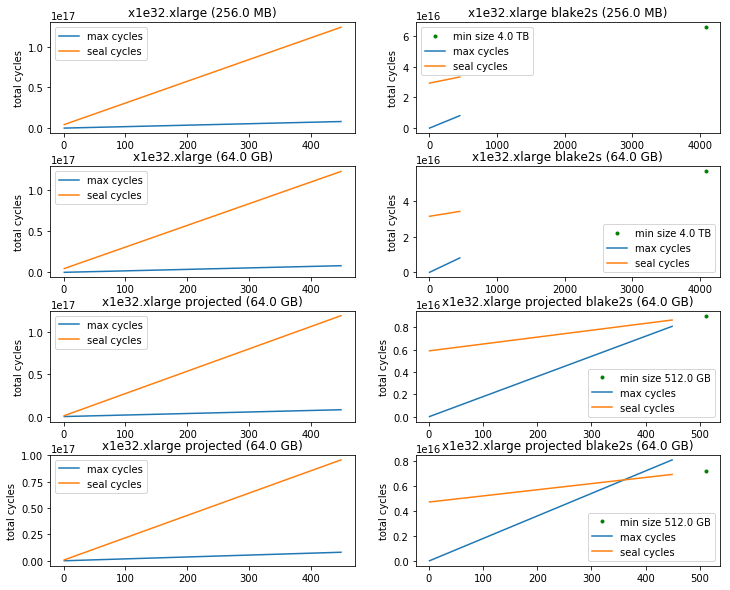

In [6]:
compare_zigzags(alternatives, requirements=filecoin_scaling_requirements)

In [7]:
target_sector_size=64*GiB

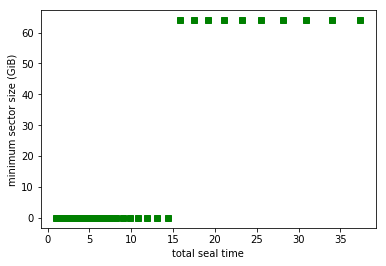

In [8]:
plot_relaxed_requirements(x1e32_projected, filecoin_scaling_requirements, target_sector_size)

In [9]:
# Doesn't terminate.
# plot_accelerated_proving(x1e32_projected, filecoin_scaling_requirements, target_sector_size)

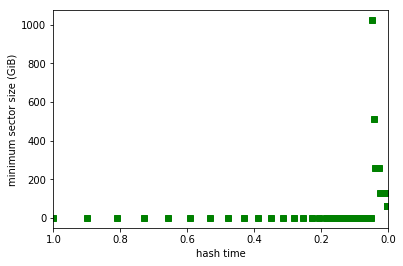

In [10]:
plot_accelerated_hashing(x1e32_projected, filecoin_scaling_requirements, target_sector_size)

In [11]:
x1e32_projected.meets_performance_requirements(64 * GiB, filecoin_scaling_requirements)

False

In [12]:
x1e32_projected_relaxed.meets_performance_requirements(64 * GiB, filecoin_scaling_requirements)

False

In [13]:
pb = x1e32_projected.scaled_for_new_hash(blake2s)
prb = x1e32_projected_relaxed.scaled_for_new_hash(blake2s)

In [14]:
humanize_bytes(x1e32_projected.minimum_viable_sector_size(filecoin_scaling_requirements))

'0.0 bytes'

In [15]:
humanize_bytes(x1e32_projected_relaxed.minimum_viable_sector_size(filecoin_scaling_requirements))

'0.0 bytes'

In [16]:
humanize_bytes(prb.minimum_viable_sector_size(filecoin_scaling_requirements))

'512.0 GB'

In [17]:
humanize_bytes(pb.minimum_viable_sector_size(filecoin_scaling_requirements))

'512.0 GB'